## Peak time and Bisection



In [1]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Noise function is already given:

In [2]:
def noise(s):
    rand = random.uniform(0.001,0.999)
    return s * math.log((1 - rand)/rand)

### Time to pulses 

In [3]:
def time_to_pulses(time, t_0 = 0.011, a = 1.1, b = 0.015, add_noise = True):
    
    pulses = 0
    pulse_duration = t_0
    
    while time >= pulse_duration:
        time = time - pulse_duration
        pulses = pulses + 1
        pulse_duration = a * pulse_duration + add_noise * noise(b * a * pulse_duration)
        
    return pulses

In [4]:
intervals = [0, 0.011, 0.025, 0.1, 0.5, 1, 10]
print("t (s)", "\t", "pulses")
for t in intervals:
    print(t, "\t", time_to_pulses(t))

t (s) 	 pulses
0 	 0
0.011 	 1
0.025 	 2
0.1 	 6
0.5 	 18
1 	 24
10 	 48


### Pulses to time

In [5]:
def pulses_to_time(pulses, t_0 = 0.011, a = 1.1, b = 0.015, add_noise = True):
    
    time = 0
    pulse_duration = t_0
    
    while pulses > 0:
        time = time + pulse_duration
        pulses = pulses - 1
        pulse_duration = a * pulse_duration + add_noise * noise(b * a * pulse_duration)
    
    return time

In [6]:
pulses_to_time(25)

1.0245136644138544

### Peak time example

In [7]:
def peak(t, reps = 10, n_training = 10, n_trials = 100):
    results = pd.DataFrame(columns = ['rep', 'val'])
    for rep in range(reps):
        goal_pulses = 0
        for i in range(n_training):
            goal_pulses += time_to_pulses(t)
        goal_pulses = goal_pulses / n_training
        for i in range(n_trials):
            val = pulses_to_time(goal_pulses)
            results.loc[len(results)] = [rep, val]
    return results['val']

In [11]:
res21 = peak(21)
res12 = peak(12)
res8 = peak(8)

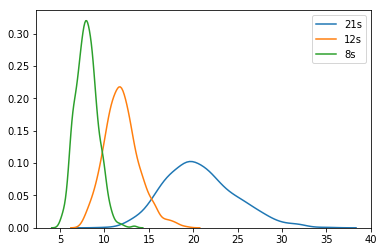

In [12]:
sns.kdeplot(np.array(res21), label="21s")
sns.kdeplot(np.array(res12), label="12s")
sns.kdeplot(np.array(res8), label="8s")

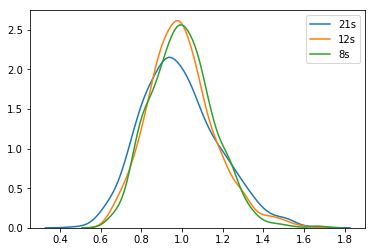

In [13]:
res21s = res21 / 21
res12s = res12 / 12
res8s = res8 /8
sns.kdeplot(np.array(res21s), label="21s")
sns.kdeplot(np.array(res12s), label="12s")
sns.kdeplot(np.array(res8s), label="8s")

### Bisection

In [14]:
def bisection(values, reps = 100, n_training = 10, n_trials = 10):
    
    training_short = min(values)
    training_long = max(values)
    
    results = pd.DataFrame(columns = ['rep', 'interval', 'prop_long'])
    
    for rep in range(reps):
        
        # training
        short = [time_to_pulses(training_short) for i in range(n_training)]
        short_pulses = sum(short) / len(short)
        long = [time_to_pulses(training_long) for i in range(n_training)]
        long_pulses = sum(long) / len(long)
        
        # testing
        for val in values:
            pulses = [time_to_pulses(val) for i in range(n_trials)]
            long_response = [p - short_pulses > long_pulses - p for p in pulses]
            prop_long = sum(long_response) / len(long_response)
            results.loc[len(results)] = [rep, val, prop_long]
    
    # plot mean proportion of long responses
    results = results.groupby(['interval'])['prop_long'].mean().reset_index()
    plt.plot(results['interval'], results['prop_long'], marker = "o")
    plt.xlabel("Time interval (s)")
    plt.ylabel("Proportion long")

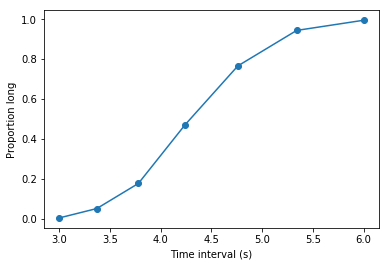

In [15]:
values_3to6 = [3, 3.37, 3.78, 4.24, 4.76, 5.34, 6]
bisection(values_3to6)

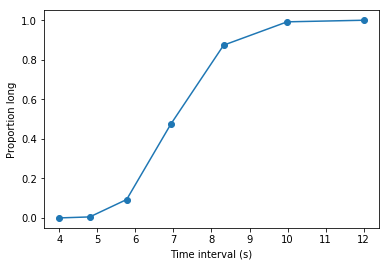

In [16]:
values_4to12 = [4, 4.8, 5.77, 6.93, 8.32, 9.99, 12]
bisection(values_4to12)

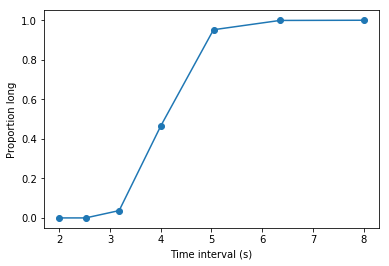

In [17]:
values_2to8 = [2, 2.52, 3.18, 4, 5.04, 6.35, 8]
bisection(values_2to8)